<a href="https://colab.research.google.com/github/ravi-gopalan/lstm_analyses/blob/master/lstm_prediction_WDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [58]:
!git clone -l -s git://github.com/ravi-gopalan/lstm_analyses.git cloned-repository

Cloning into 'cloned-repository'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 385.15 KiB | 690.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


In [59]:
!ls

cloned-repository  sample_data	WDC.csv


In [60]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv('cloned-repository/WDC_2001_2019.csv', parse_dates=['Date'], date_parser=dateparse)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719 entries, 0 to 4718
Data columns (total 7 columns):
Date         4719 non-null datetime64[ns]
Open         4719 non-null float64
High         4719 non-null float64
Low          4719 non-null float64
Close        4719 non-null float64
Adj Close    4719 non-null float64
Volume       4719 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 258.1 KB


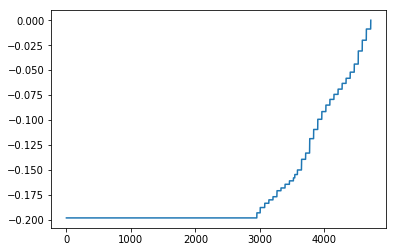

In [61]:
plt.plot((df['Adj Close']-df['Close'])/df['Close'])

In [62]:
df.head()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,2.5625,2.5625,2.3125,2.3125,1.854065,703000
1,2001-01-03,2.3750,2.8125,2.3125,2.8125,2.254943,1685100
2,2001-01-04,3.0625,3.3750,2.9375,3.2500,2.605713,3339400
3,2001-01-05,3.2500,3.3125,3.0000,3.2500,2.605713,1200900
4,2001-01-08,3.2500,3.3125,3.1250,3.2500,2.605713,849200


,Date,Open,High,Low,Close,Adj Close,Volume
4714,2019-09-30,60.340000,60.439999,58.830002,59.639999,59.115185,3799400
4715,2019-10-01,60.060001,61.110001,58.369999,58.590000,58.074425,3177100
4716,2019-10-02,57.810001,57.939999,56.150002,56.820000,56.320000,5590700
4717,2019-10-03,56.570000,57.820000,55.480000,57.779999,57.779999,4083100
4718,2019-10-04,58.150002,58.720001,58.000000,58.570000,58.570000,2035275


In [63]:
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,2.5625,2.5625,2.3125,2.3125,1.854065,703000
2001-01-03,2.3750,2.8125,2.3125,2.8125,2.254943,1685100
2001-01-04,3.0625,3.3750,2.9375,3.2500,2.605713,3339400
2001-01-05,3.2500,3.3125,3.0000,3.2500,2.605713,1200900
2001-01-08,3.2500,3.3125,3.1250,3.2500,2.605713,849200


In [64]:
df.drop(columns=['Adj Close'],inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-02,2.5625,2.5625,2.3125,2.3125,703000
2001-01-03,2.3750,2.8125,2.3125,2.8125,1685100
2001-01-04,3.0625,3.3750,2.9375,3.2500,3339400
2001-01-05,3.2500,3.3125,3.0000,3.2500,1200900
2001-01-08,3.2500,3.3125,3.1250,3.2500,849200


In [65]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['Open'].rolling(window).mean()
rolling_std = df['Open'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
df.head()
df.tail()

,Open,High,Low,Close,Volume,Rolling Mean,Bollinger High,Bollinger Low
Date,,,,,,,,
2001-01-02,2.5625,2.5625,2.3125,2.3125,703000,NaN,NaN,NaN
2001-01-03,2.3750,2.8125,2.3125,2.8125,1685100,NaN,NaN,NaN
2001-01-04,3.0625,3.3750,2.9375,3.2500,3339400,NaN,NaN,NaN
2001-01-05,3.2500,3.3125,3.0000,3.2500,1200900,NaN,NaN,NaN
2001-01-08,3.2500,3.3125,3.1250,3.2500,849200,NaN,NaN,NaN


,Open,High,Low,Close,Volume,Rolling Mean,Bollinger High,Bollinger Low
Date,,,,,,,,
2019-09-30,60.340000,60.439999,58.830002,59.639999,3799400,61.558095,66.317802,56.798387
2019-10-01,60.060001,61.110001,58.369999,58.590000,3177100,61.770952,65.744583,57.797320
2019-10-02,57.810001,57.939999,56.150002,56.820000,5590700,61.827142,65.518814,58.135471
2019-10-03,56.570000,57.820000,55.480000,57.779999,4083100,61.718095,65.882853,57.553336
2019-10-04,58.150002,58.720001,58.000000,58.570000,2035275,61.605714,66.026860,57.184568


In [70]:
df.iloc[4526,:]

Open              3.804000e+01
High              3.809000e+01
Low               3.582000e+01
Close             3.697000e+01
Volume            6.960500e+06
Rolling Mean      4.046000e+01
Bollinger High    4.803532e+01
Bollinger Low     3.288468e+01
Name: 2018-12-31 00:00:00, dtype: float64

In [71]:
4526-2074

2452

In [9]:
df.iloc[2074,:]

Open              3.804000e+01
High              3.809000e+01
Low               3.582000e+01
Close             3.697000e+01
Volume            6.960500e+06
Rolling Mean      4.046000e+01
Bollinger High    4.803532e+01
Bollinger Low     3.288468e+01
Name: 2018-12-31 00:00:00, dtype: float64

In [72]:
df.iloc[4566,:]

Open              4.815000e+01
High              5.052000e+01
Low               4.666000e+01
Close             5.030000e+01
Volume            1.105930e+07
Rolling Mean      4.748524e+01
Bollinger High    5.178234e+01
Bollinger Low     4.318813e+01
Name: 2019-02-28 00:00:00, dtype: float64

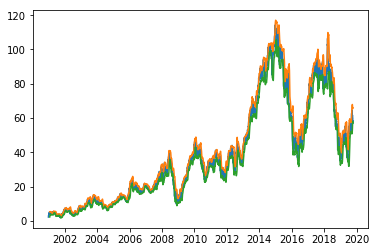

In [73]:
sns.lineplot(data=df['Close'])
sns.lineplot(data=df['Bollinger High'])
sns.lineplot(data=df['Bollinger Low'])

In [74]:
close_array = df.values
close_array.shape
close_array[:2]

(4719, 8)

array([[2.5625e+00, 2.5625e+00, 2.3125e+00, 2.3125e+00, 7.0300e+05,
               nan,        nan,        nan],
       [2.3750e+00, 2.8125e+00, 2.3125e+00, 2.8125e+00, 1.6851e+06,
               nan,        nan,        nan]])

In [75]:
train_array = close_array[:-192,:5]
train_array.shape

(4527, 5)

In [76]:
valid_array = close_array[train_array.shape[0]:train_array.shape[0]+40,:5]
valid_array.shape

(40, 5)

In [77]:
train_array[0]

array([2.5625e+00, 2.5625e+00, 2.3125e+00, 2.3125e+00, 7.0300e+05])

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler


sc1 = MinMaxScaler((0, 1))
sc2 = MinMaxScaler((0, 1))
sc3 = MinMaxScaler((0, 1))
sc4 = MinMaxScaler((0, 1))
sc5 = MinMaxScaler((0, 1))

scale1 = sc1.fit_transform(train_array[:,0].reshape(-1, 1))
scale2 = sc2.fit_transform(train_array[:,1].reshape(-1, 1))
scale3 = sc3.fit_transform(train_array[:,2].reshape(-1, 1))
scale4 = sc4.fit_transform(train_array[:,3].reshape(-1, 1))
scale5 = sc5.fit_transform(train_array[:,4].reshape(-1, 1))


In [79]:
scaled_training_set = np.concatenate((scale1, scale2,scale3,scale4,scale5), axis=1)
scaled_training_set.shape

(4527, 5)

In [80]:
scaled_training_set[:,4]

array([0.01030651, 0.03016139, 0.06360598, ..., 0.08532485, 0.10303676,
       0.13681291])

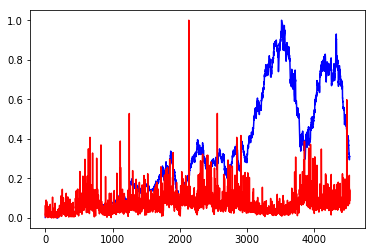

In [81]:
plt.plot(scaled_training_set[:,3],color='b',label='close')
plt.plot(scaled_training_set[:,4],color='r',label='volume')


In [0]:
# Creating a data structure with 120 timesteps and 1 output
timesteps=120
X_train = []
y_train = []
for i in range(timesteps, train_array.shape[0]):
    X_train.append(scaled_training_set[i-timesteps:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [84]:
X_train.shape
y_train.shape

(4407, 120, 1)

(4407,)

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(rate=0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'nadam', loss = 'mean_squared_error')

In [90]:
epoch_trials = [100]
batch_size_trials = [228]

reg_models = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor.fit(X_train, y_train, epochs = n_epochs, batch_size = b_size)
    reg_models.append(regressor)


Epoch 1/100
4407/4407 [==============================] - 20s 5ms/step - loss: 0.0200
Epoch 2/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0056
Epoch 3/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0045
Epoch 4/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0050
Epoch 5/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0028
Epoch 6/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0034
Epoch 7/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0032
Epoch 8/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0028
Epoch 9/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0029
Epoch 10/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0017
Epoch 11/100
4407/4407 [==============================] - 17s 4ms/step - loss: 0.0023
Epoch 12/100
4407/4407 [==============================] - 17s 4

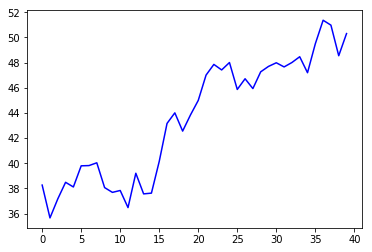

In [91]:
plt.plot(valid_array[:,3],color='b',label='valid-close')

In [92]:
inputs_array = close_array[train_array.shape[0]-timesteps:train_array.shape[0]+40]
inputs_array.shape


(160, 8)

In [93]:
inputs_array[0]

array([7.92500000e+01, 7.93399960e+01, 7.78899990e+01, 7.81900020e+01,
       3.20030000e+06, 7.96557148e+01, 8.39579916e+01, 7.53534380e+01])

In [0]:
valid_scale1 = sc1.fit_transform(inputs_array[:,0].reshape(-1, 1))
valid_scale2 = sc2.fit_transform(inputs_array[:,1].reshape(-1, 1))
valid_scale3 = sc3.fit_transform(inputs_array[:,2].reshape(-1, 1))
valid_scale4 = sc4.fit_transform(inputs_array[:,3].reshape(-1, 1))
valid_scale5 = sc5.fit_transform(inputs_array[:,4].reshape(-1, 1))

In [95]:
scaled_validation_set = np.concatenate((valid_scale1, valid_scale2,valid_scale3,valid_scale4,valid_scale5), axis=1)
scaled_validation_set.shape

(160, 5)

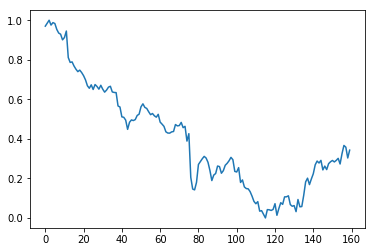

In [96]:
plt.plot(scaled_validation_set[:,3])

In [97]:
X_test = []
for i in range(timesteps, timesteps+40):
    X_test.append(scaled_validation_set[i-timesteps:i,0])
X_test = np.array(X_test)
X_test.shape

(40, 120)

In [98]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(40, 120, 1)

In [99]:
X_train.shape

(4407, 120, 1)

In [0]:
scaled_preds = []
prices = []
for reg_model in reg_models:
  scaled_preds.append(reg_model.predict(X_test))
  prices.append(sc1.inverse_transform(reg_model.predict(X_test)))



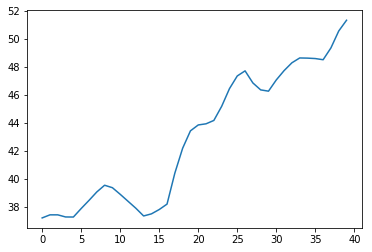

In [101]:
plt.plot(prices[0])

Text(0.5, 1.0, 'WDC Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'WDC Stock Price')

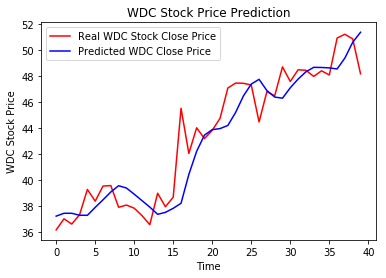

In [102]:
# Visualising the results
plt.plot(valid_array[:,0], color = 'red', label = 'Real WDC Stock Close Price')
plt.plot(prices[0], color = 'blue', label = 'Predicted WDC Close Price')
plt.title('WDC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('WDC Stock Price')
plt.legend()
plt.show()

In [0]:
reg_model.save('reg_model.hdf5')